# Bivariate Plotting With Seaborn

In [1]:
import pandas as pd
import numpy as np
import os 

###  Load the Dataset

In [2]:
filename = os.path.join(os.getcwd(), "data", "adult.data.partial")
df = pd.read_csv(filename, header=0)

### Glance at the Data

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,label
0,36,State-gov,112074,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Non-Female,0,0,45,United-States,<=50K
1,35,Private,32528,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Non-Female,0,0,45,United-States,<=50K
2,21,Private,270043,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,16,United-States,<=50K
3,45,Private,168837,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,24,Canada,>50K
4,39,Private,297449,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,0,0,40,United-States,>50K


### Get the Dimensions of the Dataset

In [ ]:
df.shape

## Plot Multiple Variables Using `seaborn`

Load `matplotlib` and `seaborn` packages

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme() # this line activates a signature aesthetic that makes seaborn plots look better

###  Filter the Dataset

We will work with the following subset of our data: we will keep only 3 numeric features, one categorical feature, and one label.

The code cell below filters `df` into a new DataFrame `df_sub`, keeping only the following columns: `age`, `capital-gain`, `hours-per-week`, `education`, and the outcome `label`.

In [5]:
df_sub = df[['age', 'capital-gain', 'hours-per-week', 'education','label']].copy() 
# Don't be alarmed by the sudden use of .copy() here!
# Adding it is not necessary. We could remove it, but then we would get some warnings down the line.
# The code would still run correctly either way.

### Produce a Pairplot on the Numeric Features Using `seaborn`

Plotting a histogram of a given column is a common way to understand the distribution of this feature in your dataset. The code below accomplishes this using the `pairplot()` function from the `seaborn` package.

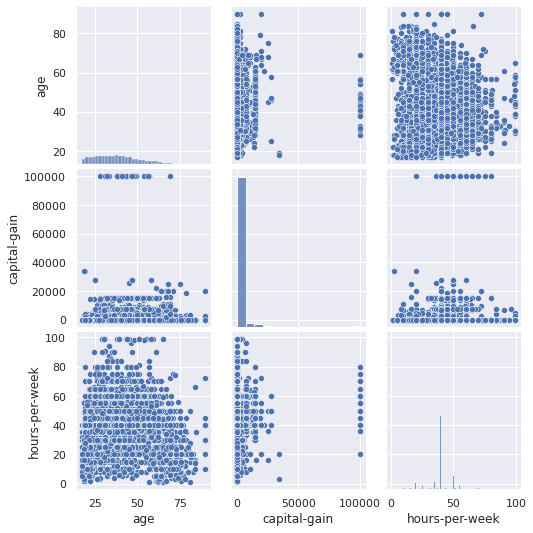

In [6]:
sns.pairplot(data=df_sub)

The pairwise scatter plots do not make obvious any straightforward relationships between the variables. It seems that `capital-gains` is concentrated at 0, so the fact that this variable has little variability may explain why we did not see strong correlation with, say, `age`. <br>
But can we conclude that the variables are independent by looking at the apparent lack of covariability between `age` and `hours-per-week`? We can make a new, better plot that will help establish this. In particular, we will modify the plot above to:
1. use two different colors based on the outcome (label) value.
2. decrease the size of the points to de-clutter the display and better see if a 'tilt' characteristical of correlated features is emerging.

(Note: recall that the label in our data signifies wether the salary for the observed individual is above $50K.)

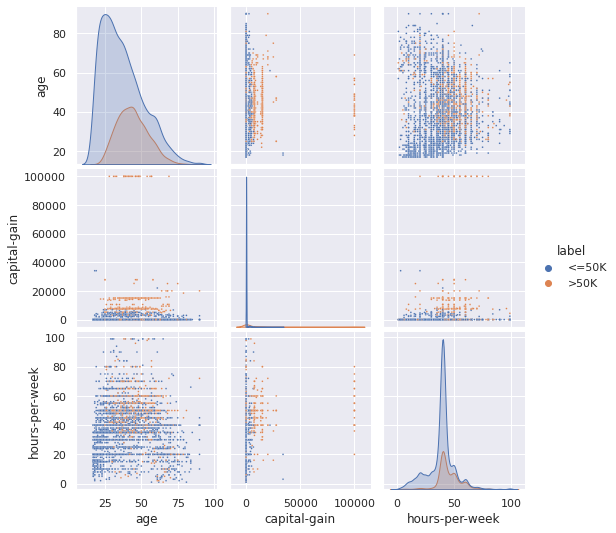

In [7]:
sns.pairplot(data=df_sub, hue = 'label', plot_kws={'s':3})

This version of the plot looks much better, in that it passes the 'sanity check' by meeting some of our expectations: for example, in the top-right corner we see that zero hours per week worked is common for extremely high and extremely low ends of the age range. This makes sense!<br>
It also makes sense that all of the 'outlier' points of very high capital gain are also points that have the '>50K' value of the label. 

### Produce a Bar Plot on the Categorical Feature (with y=label)

First, let's properly format our categorical feature `education` in `df_sub` by converting it to a `Pandas.Categorical` format. Do you remember how to do this? Run the cell below.

In [8]:
cat_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', 
             '9th', '10th', '11th', '12th', 'HS-grad', 
             'Prof-school', 'Assoc-acdm', 'Assoc-voc', 
             'Some-college', 'Bachelors', 'Masters', 'Doctorate']

df_sub['education'] = pd.Categorical(df_sub['education'], cat_order)

Your objective is now to plot a histogram of all levels of `education` on the x-axis, with the counts of occurances being on the y-axis, with one additional detail: split every bar into two parts of different colors, depending on the value of `label`. 
In other words, for every education level (for example, 'Bachelors'), the count bar should be part orange and part blue (these are the default colors), where the size of each part is the relative size of 'income >50K' to 'income<=50K' (among 'Bachelors').
You will need to use `hue` and `multiple` parameters of the `seaborn.histplot()` function. 
Inspect the code below to see how this is accomplished.

<AxesSubplot:xlabel='education', ylabel='Count'>

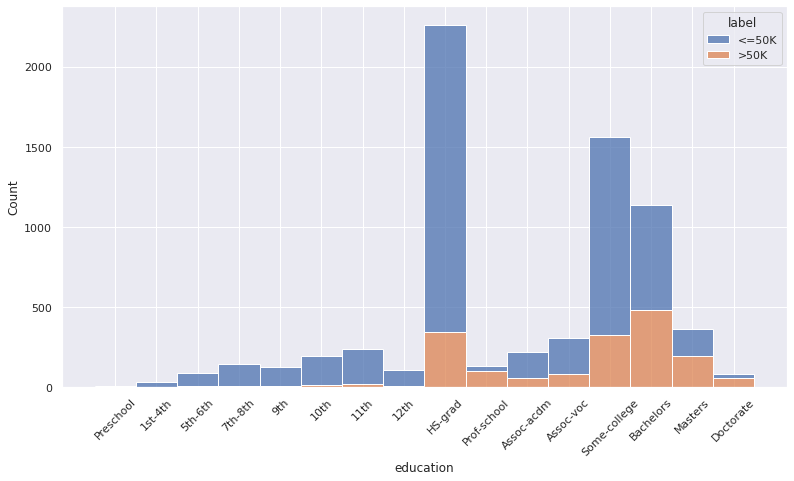

In [9]:
fig1 = plt.figure(figsize=(13,7)) 
t1 = plt.xticks(rotation=45)


sns.histplot(data=df_sub, x="education", hue='label',  multiple="stack")

In [10]:
df_sub['label'] = (df_sub['label'] =='>50K').astype(int)

In [11]:
df_sub

,age,capital-gain,hours-per-week,education,label
0,36,0,45,Doctorate,0
1,35,0,45,HS-grad,0
2,21,0,16,Some-college,0
3,45,0,24,Some-college,1
4,39,0,40,Bachelors,1
...,...,...,...,...,...
6995,31,2829,40,HS-grad,0
6996,19,0,40,10th,0
6997,44,0,40,Some-college,0
6998,45,0,40,11th,0


Another way to analyze the distribution between the two label classes for the data grouped by the education category is to use a `barplot()`:

<AxesSubplot:xlabel='education', ylabel='label'>

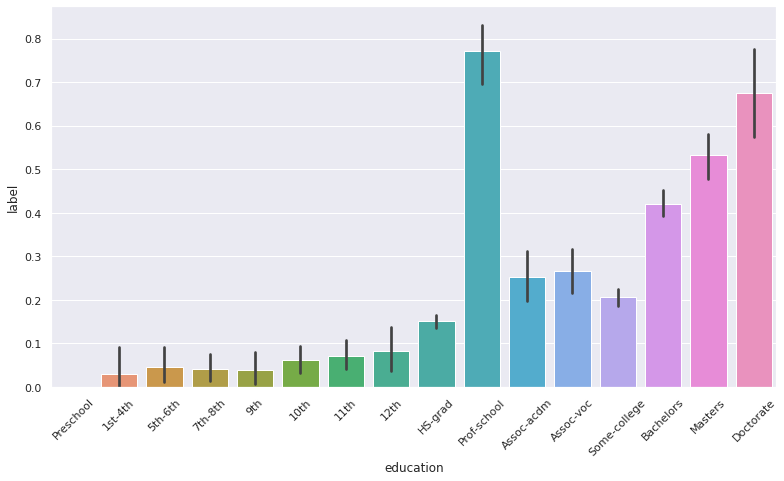

In [12]:
fig2 = plt.figure(figsize=(13,7)) 
t2 = plt.xticks(rotation=45)
sns.barplot(data = df_sub, x='education', y='label')

Here, the y-axis represents the average class label for each educational category (that is, the average of all the 0 and 1 values encountered in a particular education group). 
Note: the black lines represent the 95% confidence interval.